In [83]:
import numpy as np
import matplotlib.pyplot as plt
from dndt import calc_dndt
from evalf import evalf

from scipy.integrate import odeint

%load_ext autoreload
%autoreload 2



def better_imshow(row_vals, col_vals, data, ax=None):
    #row_vals and col_vals are the data that was swept over
    assert len(row_vals) == data.shape[0], 'length of row_vals does not match shape of data'
    assert len(col_vals) == data.shape[1], 'length of col_vals does not match shape of data'
    if ax == None:
        plt.imshow(data, origin='lower', extent=[col_vals[0], col_vals[-1], row_vals[0], row_vals[-1]], aspect='auto')
    else:
        ax.imshow(data, origin='lower', extent=[col_vals[0], col_vals[-1], row_vals[0], row_vals[-1]], aspect='auto')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


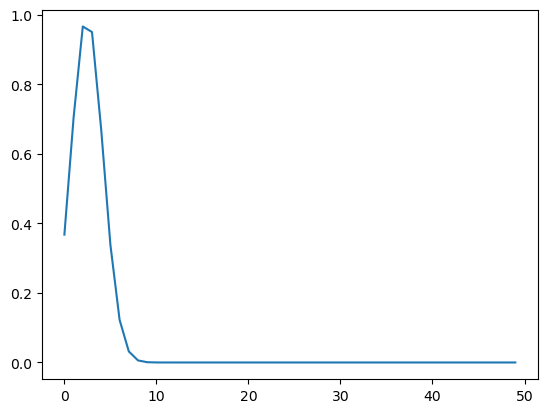

In [161]:
L_list = np.linspace(0,20)

n = np.exp(-(L_list - 1)**2)
delC = 1

x = np.hstack([delC, n])

p = {"L_list" : L_list,
     "dlogV_dt" : 0.0}

plt.plot(n)


In [167]:
tlist = np.linspace(0,10,2000) #units??

x_t = odeint(evalf, y0=x, t=tlist, args=(p,None))

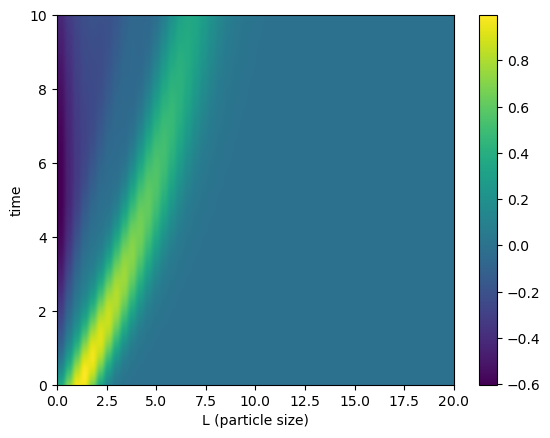

In [168]:
n_t = x_t[:,1:]
better_imshow(tlist, L_list, n_t)
plt.ylabel('time')
plt.xlabel('L (particle size)')
plt.colorbar()

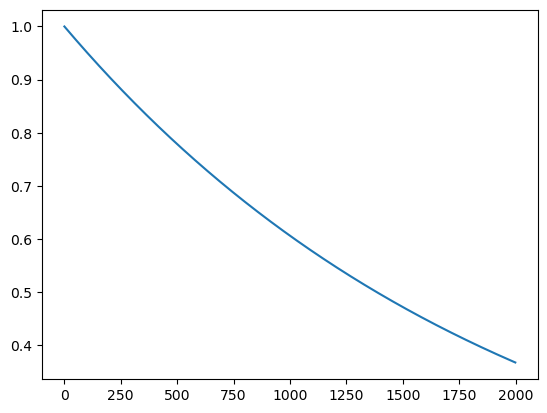

In [164]:
plt.plot(x_t[:,0]) #supersaturation concentration